In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt

In [2]:
%cd ../data/

/home/explorer/BMS270/data


In [3]:
from csv import reader, excel_tab

In [4]:
orfs = []
names = []
data = []
fin = reader(open("GSE88801_kallisto_TPMs_thresh10.cdt"),dialect=excel_tab)
header = next(fin)[2:]
for row in fin:
    orfs.append(row[0])
    names.append(row[1])
    data.append([float(i) for i in row[2:]])

In [5]:
import numpy as np

In [6]:
A = np.array(data)

In [7]:
A.shape, A.dtype

((9939, 36), dtype('float64'))

In [8]:
np.mean(A)

4.7600470545758755

In [9]:
m = np.mean(A,axis=0)

In [10]:
m.shape

(36,)

In [11]:
m = np.mean(A,axis=1)

In [12]:
m.shape

(9939,)

In [13]:
m = m.reshape((9939,1))

In [14]:
m.shape

(9939, 1)

In [15]:
D = A - m

In [16]:
D.shape

(9939, 36)

<IPython.core.display.Javascript object>


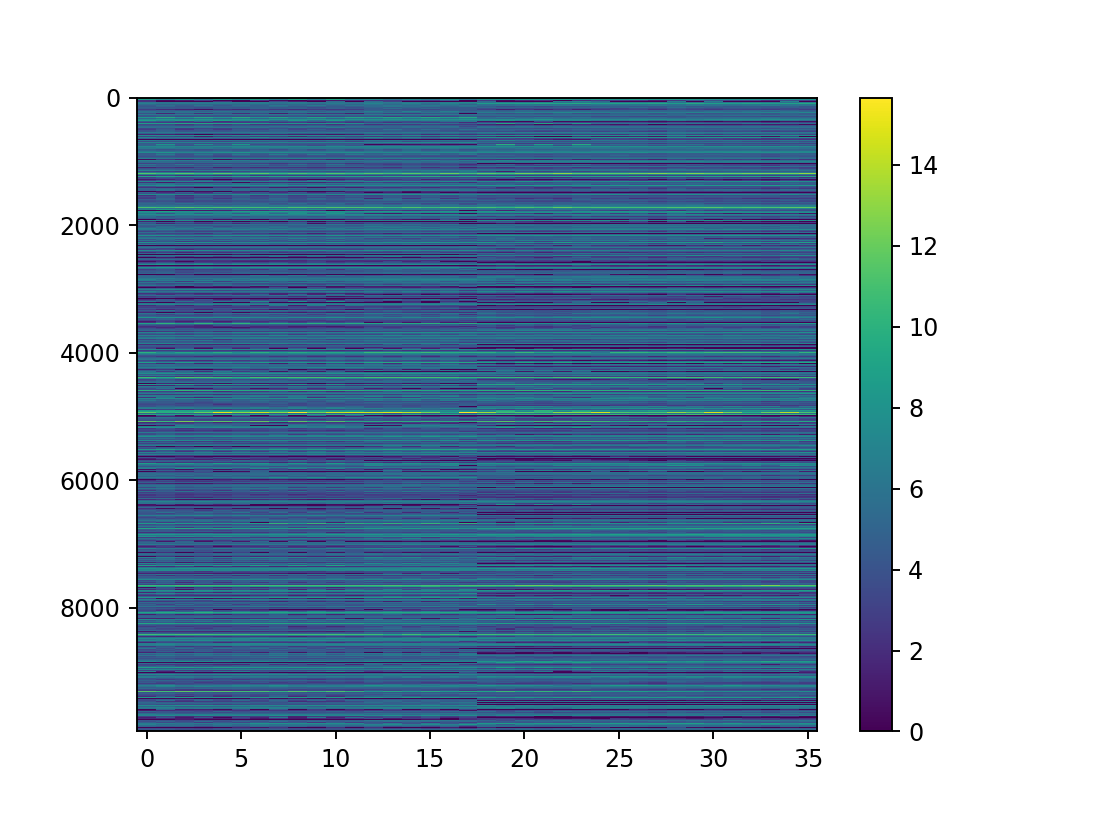

In [18]:
fig = plt.figure()
plt.imshow(A, interpolation="none", aspect="auto")
plt.colorbar()

<IPython.core.display.Javascript object>


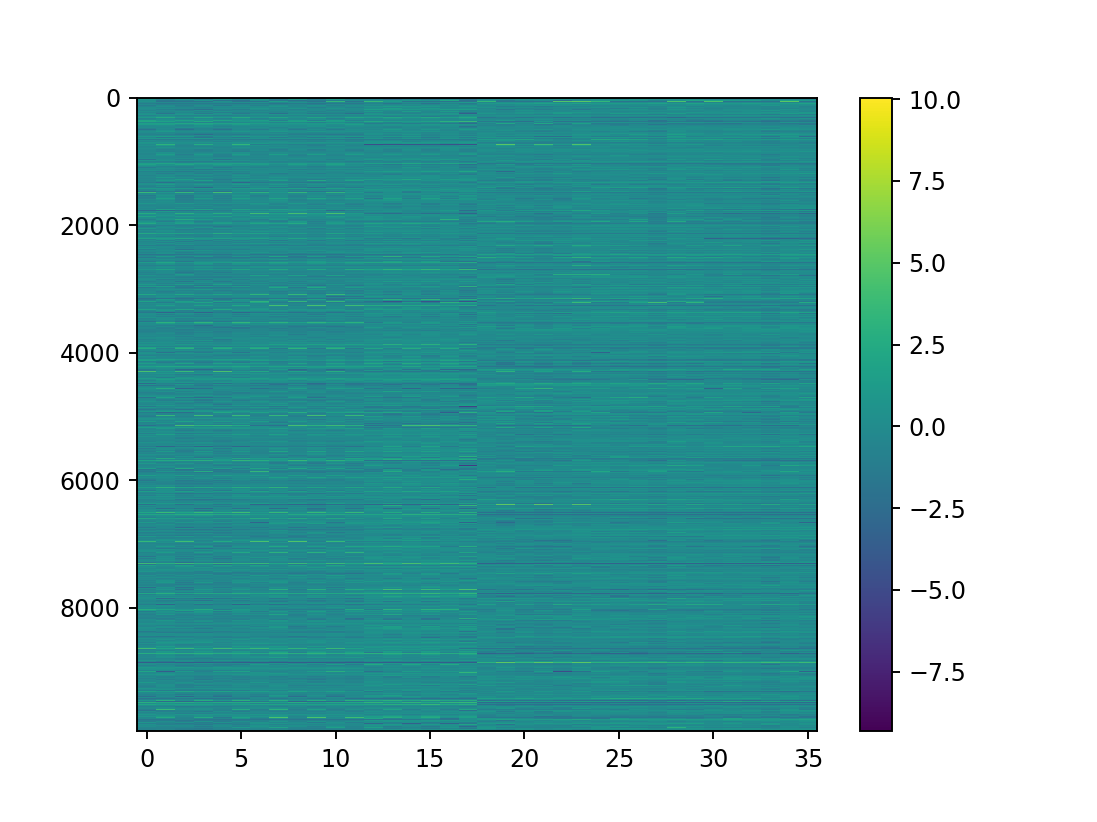

In [19]:
fig = plt.figure()
plt.imshow(D, interpolation="none", aspect="auto")
plt.colorbar()

In [20]:
from numpy.linalg import norm

In [21]:
s = norm(D, axis=1)

In [22]:
s.shape

(9939,)

In [23]:
s = s.reshape((9939,1))

In [24]:
C = D/s

<IPython.core.display.Javascript object>


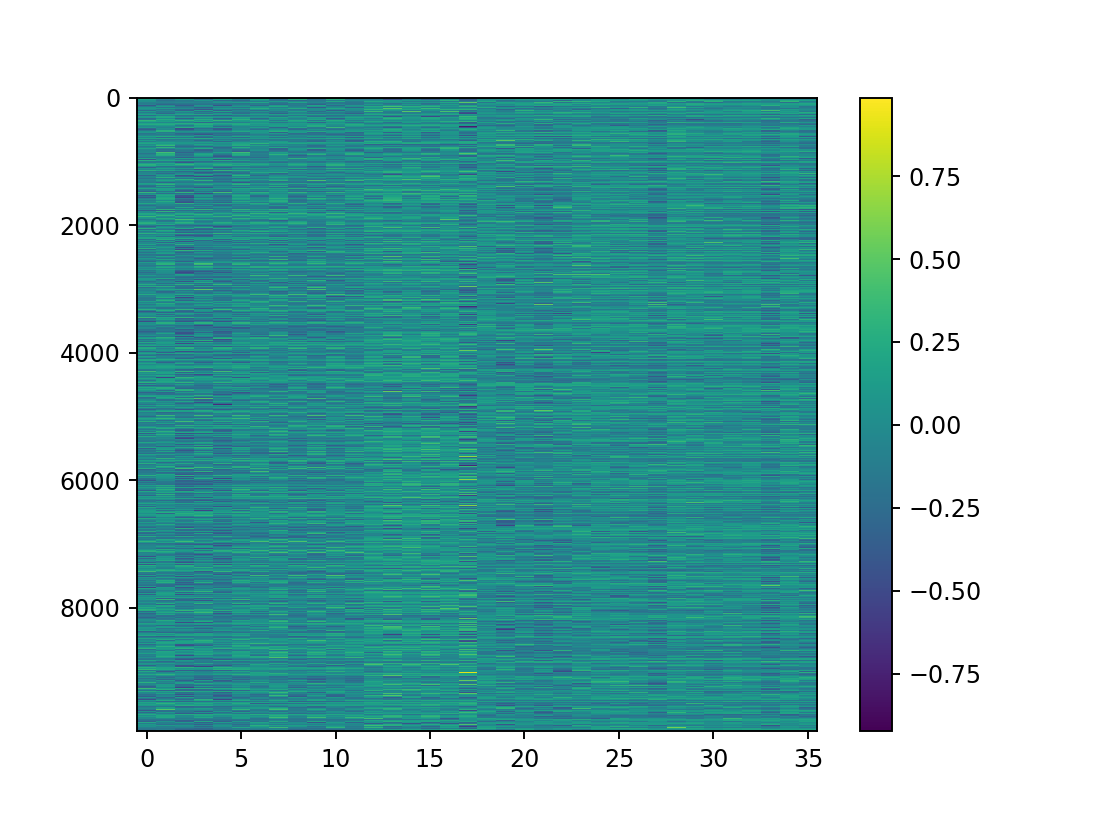

In [26]:
fig = plt.figure()
plt.imshow(C, interpolation="none", aspect="auto")
plt.colorbar()

In [28]:
header[:10]

['BMDM_Live_1_4h',
 'BMDM_Live_1_24h',
 'BMDM_Live_2_4h',
 'BMDM_Live_2_24h',
 'BMDM_Live_3_4h',
 'BMDM_Live_3_24h',
 'BMDM_Dead_1_4h',
 'BMDM_Dead_1_24h',
 'BMDM_Dead_2_4h',
 'BMDM_Dead_2_24h']

<IPython.core.display.Javascript object>


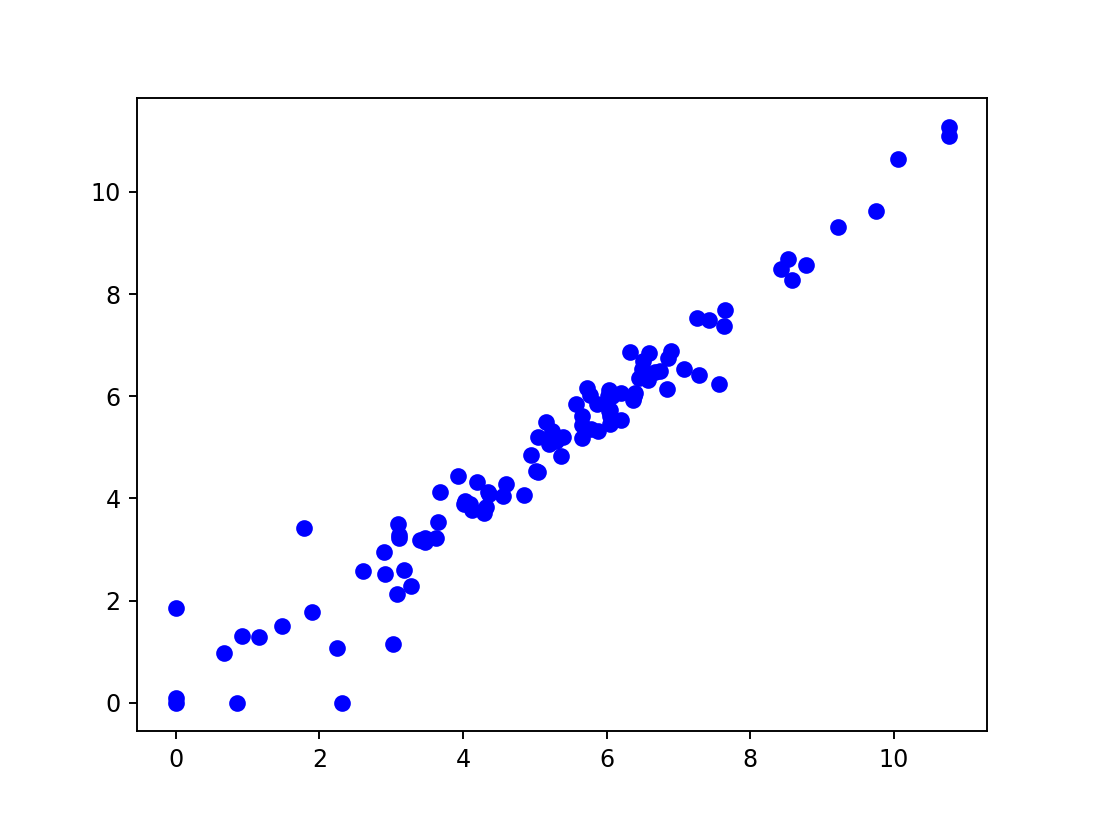

In [29]:
fig = plt.figure()
plt.plot(A[:100,0],A[:100,2],"bo")

<IPython.core.display.Javascript object>


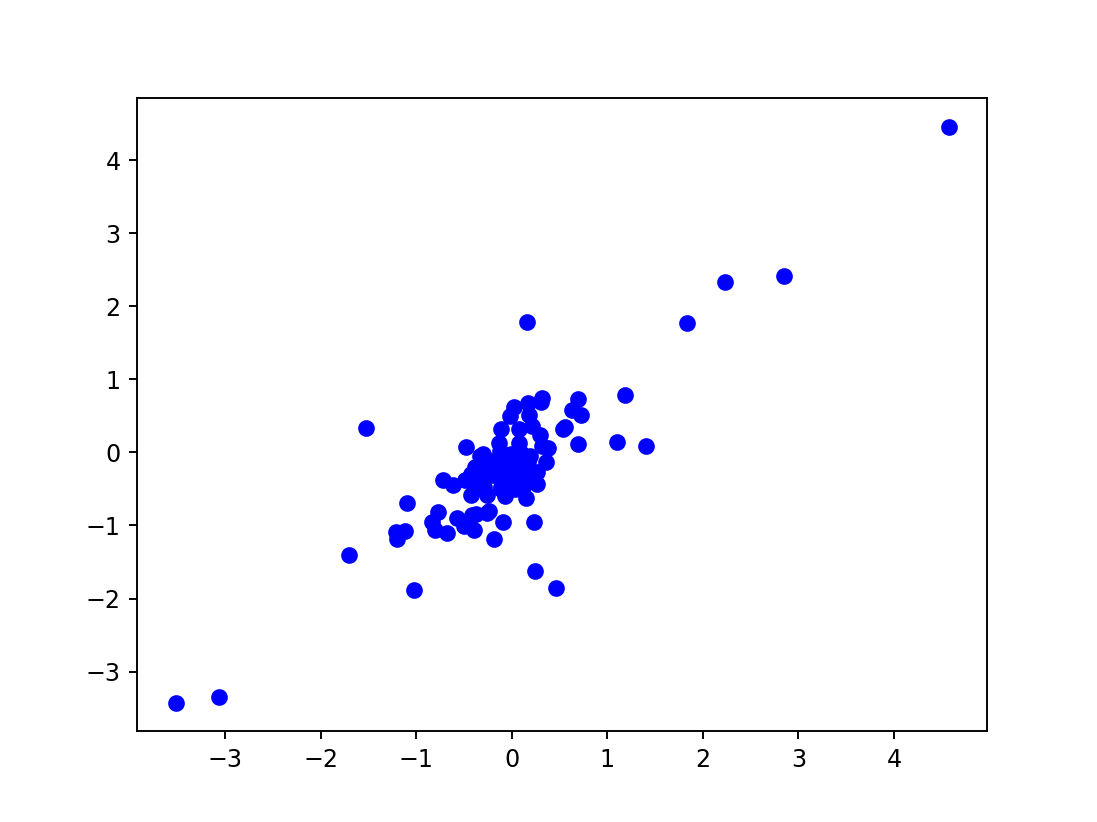

In [30]:
fig = plt.figure()
plt.plot(D[:100,0],D[:100,2],"bo")

<IPython.core.display.Javascript object>


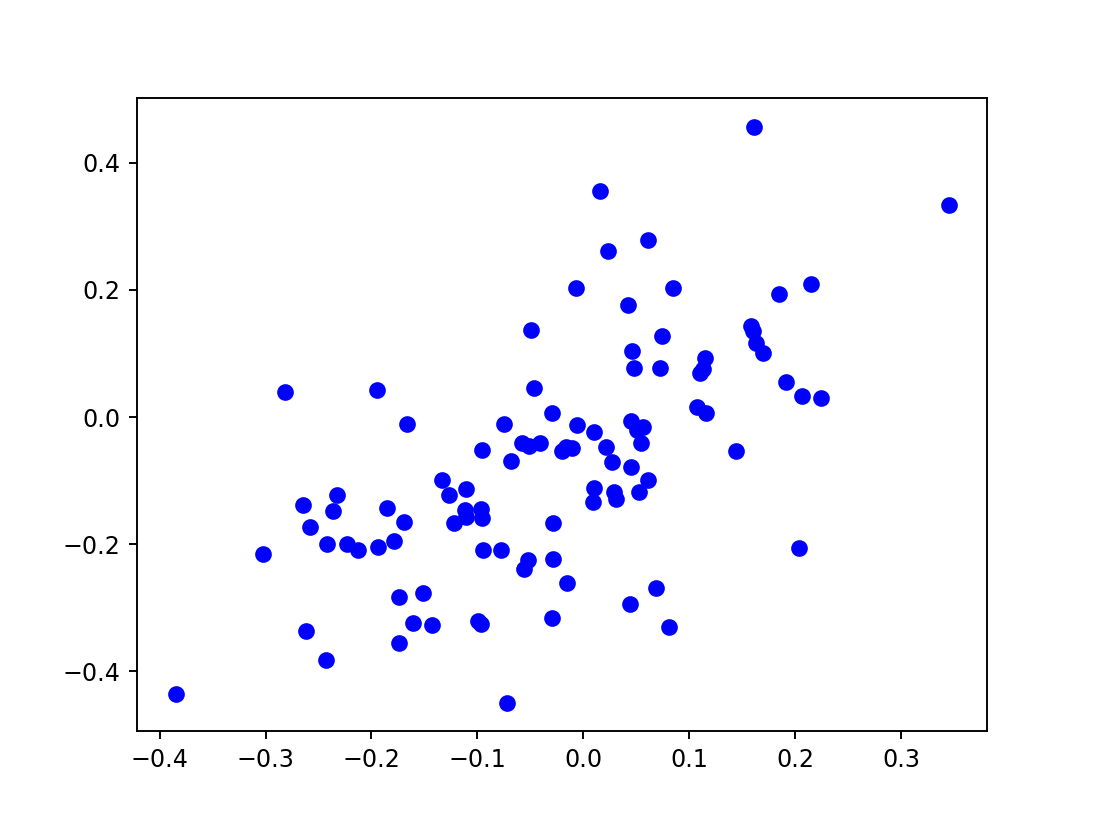

In [31]:
fig = plt.figure()
plt.plot(C[:100,0],C[:100,2],"bo")

In [32]:
corr = np.dot(C,C.T)

In [33]:
corr.shape

(9939, 9939)

<IPython.core.display.Javascript object>


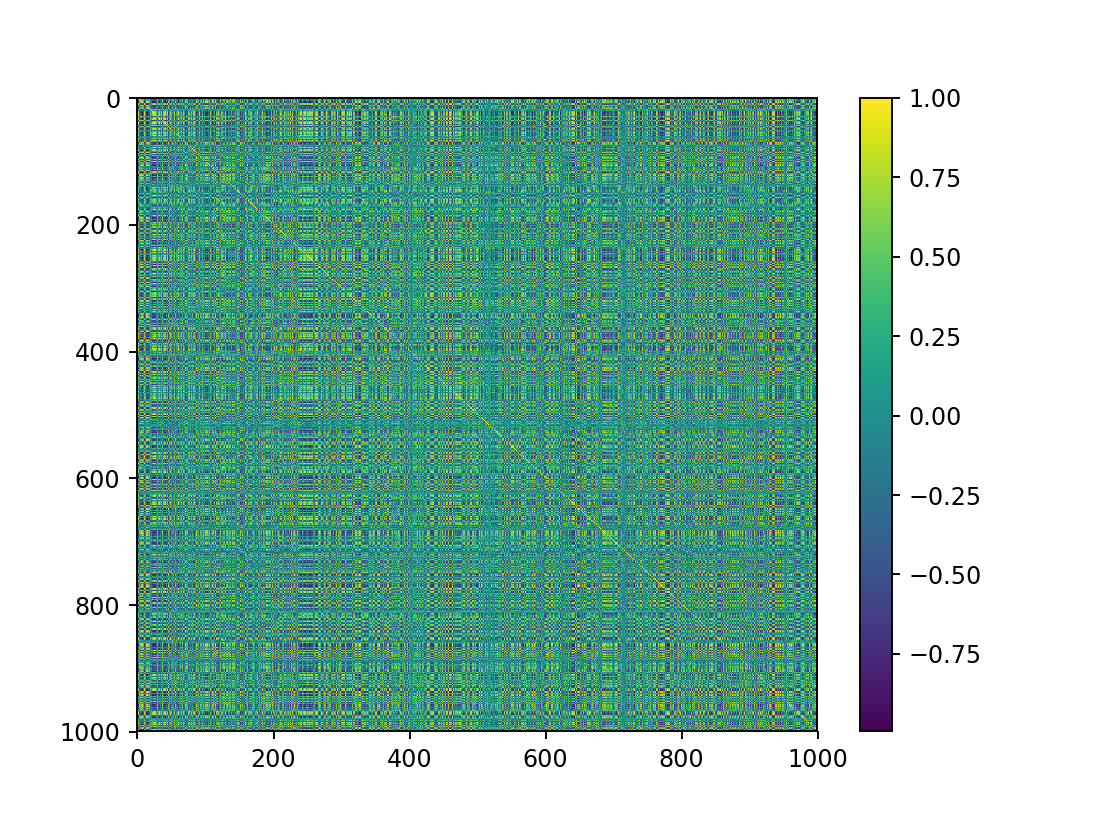

In [35]:
fig = plt.figure()
plt.imshow(corr[:1000,:1000],interpolation="none",aspect="auto")
plt.colorbar()

In [36]:
np.pi

3.141592653589793

In [37]:
theta = np.pi/2

In [38]:
rotation = np.array([[np.cos(theta),-np.sin(theta)],
                     [np.sin(theta),np.cos(theta)]])

In [39]:
rotation

array([[  6.12323400e-17,  -1.00000000e+00],
       [  1.00000000e+00,   6.12323400e-17]])

In [40]:
test_points = np.array([[1,2,3,4,5],
                       [-1,-2,3,8,7]], dtype="float")

In [41]:
test_points

array([[ 1.,  2.,  3.,  4.,  5.],
       [-1., -2.,  3.,  8.,  7.]])

<IPython.core.display.Javascript object>


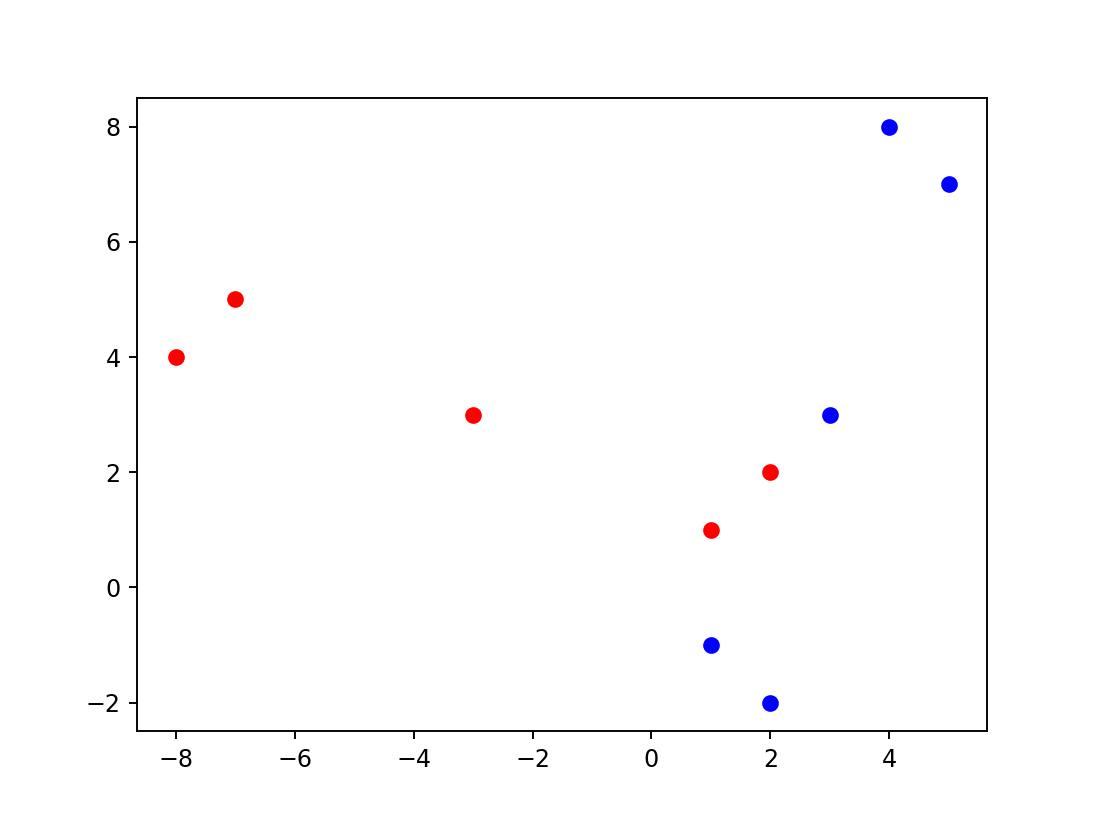

In [43]:
fig = plt.figure()
plt.plot(test_points[0],test_points[1],"bo")
rotated = np.dot(rotation,test_points)
plt.plot(rotated[0],rotated[1],"ro")

In [44]:
import Bio.Cluster as Pycluster

In [45]:
Dsub = D[:1000,:]
Dsub.shape

(1000, 36)

In [46]:
%%time
tree = Pycluster.treecluster(Dsub, dist="u")

CPU times: user 252 ms, sys: 8 ms, total: 260 ms
Wall time: 263 ms


In [47]:
Dsub = D[:2000,:]
Dsub.shape

(2000, 36)

In [48]:
%%time
tree = Pycluster.treecluster(Dsub, dist="u")

CPU times: user 1.7 s, sys: 8 ms, total: 1.7 s
Wall time: 1.74 s


In [49]:
%%time
tree = Pycluster.treecluster(D, dist="u")

CPU times: user 3min 33s, sys: 1.7 s, total: 3min 34s
Wall time: 3min 40s


In [50]:
record = Pycluster.Record()
record.data = D
record.geneid = orfs[:]
record.genename = names[:]
record.gweight = None
record.gorder = None
record.expid = header[:]
record.eweight = None
record.eorder = None
record.uniqid = "UNIQID"
record.save("GSE88801_kallisto_TPMs_thresh10.centered.um", geneclusters = tree)

<PRE>
rsync -av -e 'ssh -p 8022' explorer@localhost:BMS270/data/"\*.centered.um.\*" ./
</PRE>